In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('../../../../../dlevery/dataset/pima-indians-diabetes.csv', names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])

print(df.info())
print(df.describe())
print(df.head(5))

In [13]:
print(df[['pregnant', 'class']])

     pregnant  class
0           6      1
1           1      0
2           8      1
3           1      0
4           0      1
..        ...    ...
763        10      0
764         2      0
765         5      0
766         1      1
767         1      0

[768 rows x 2 columns]


In [14]:
print(df[['pregnant', 'class']].groupby(['pregnant'], as_index = False).mean().sort_values(by = 'pregnant', ascending = True))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


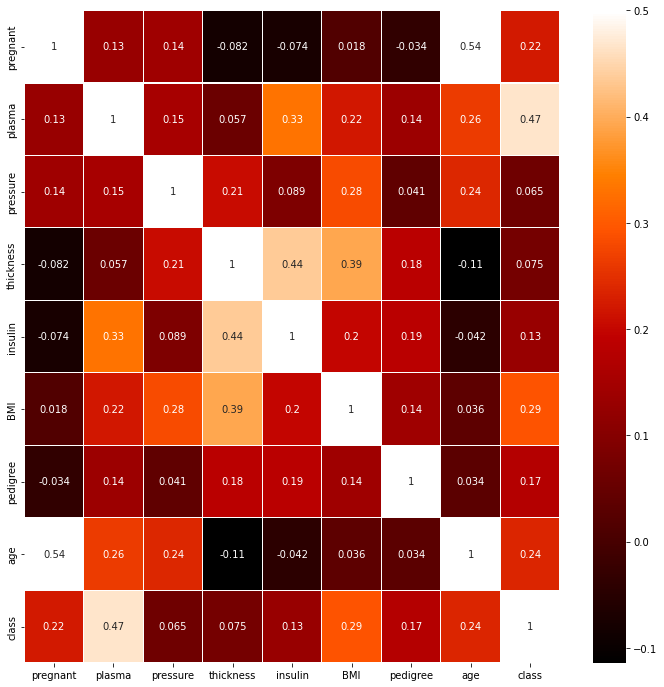

In [10]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(), linewidths=0.1, vmax = 0.5, cmap = plt.cm.gist_heat, linecolor = 'white', annot = True)
plt.show()

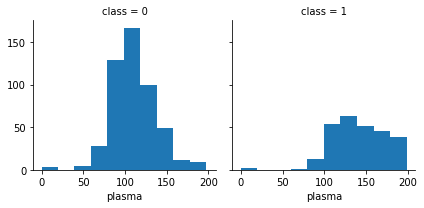

In [12]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins = 10)
plt.show()

In [22]:
seed = 3

np.random.seed(seed)
tf.random.set_seed(seed)

dataset = np.loadtxt("../../../../../dlevery/dataset/pima-indians-diabetes.csv", delimiter = ",")
x = dataset[:, 0:8]
y = dataset[:, 8]

model = Sequential()
model.add(Dense(12, input_dim = 8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(x, y, epochs = 200, batch_size = 10)

print("\n Accuracy : %.04f" % (model.evaluate(x, y)[1]))

Epoch 1/200
77/77 [==============================] - 0s 2ms/step - loss: 10.5440 - accuracy: 0.6159
Epoch 2/200
77/77 [==============================] - 0s 3ms/step - loss: 5.4366 - accuracy: 0.6029
Epoch 3/200
77/77 [==============================] - 0s 3ms/step - loss: 2.9292 - accuracy: 0.5208
Epoch 4/200
77/77 [==============================] - 0s 3ms/step - loss: 1.5346 - accuracy: 0.5208
Epoch 5/200
77/77 [==============================] - 0s 3ms/step - loss: 0.8896 - accuracy: 0.5000
Epoch 6/200
77/77 [==============================] - 0s 3ms/step - loss: 0.8072 - accuracy: 0.5234
Epoch 7/200
77/77 [==============================] - 0s 3ms/step - loss: 0.7655 - accuracy: 0.6549
Epoch 8/200
77/77 [==============================] - 0s 3ms/step - loss: 0.7306 - accuracy: 0.6628
Epoch 9/200
77/77 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.6706
Epoch 10/200
77/77 [==============================] - 0s 3ms/step - loss: 0.6656 - accuracy: 0.6758
Epoch 11